<a href="https://colab.research.google.com/github/zhafar3adib/Telco_Customer_Churn/blob/main/Final_Project_Bootcamp_Digital_Skola.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT DATA SCIENCE**

### DATAVERSE 11
### Hanindhiya Ika Septiana 
### Indra Aminudin 
### Rifza Anggriani 
### Zhafar Tri Adib

#### **Preparation**

In [95]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import classification_report, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

In [97]:
# Import Dataset 
data = pd.read_csv('https://raw.githubusercontent.com/zhafar3adib/Telco_Customer_Churn/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#dataset contains customer information which is service that used, total charges, and the Churn status

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
#Check Data Shape
data.shape

(7043, 21)

**Explanation** : There are 21 Column and 7043 Rows from Telco Customer Churn dataset

In [6]:
#Check column attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Explanation** : According to data.info() there are 18 attributes with object data type and 3 attributes with numerical data type (float and integer), for TotalCharge column we need to transform it from object data type to numerical data type

In [7]:
# Check NA data
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Check Null data
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### **Duplicates**

In [9]:
# Check duplicated data
data.duplicated().sum()

0

**Explanation** : There are no duplicate value

#### **Remove Blank Value**

In [10]:
#Check Blank value
data['TotalCharges'].str.contains(r'\s+').sum()

11

**Explanation** : There are 11 Blank value in TotalCharges column

In [11]:
#Remove Whitespace Value
data['TotalCharges'] = data['TotalCharges'].replace([' '],'0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

**Explanation**: There are Blank value in TotalCharge column because the tenure value is 0, we decided to fill the Blank value into 0 and not remove the Blank value because we need the customer information

#### **Data Visualisasi**

##### Bar Chart

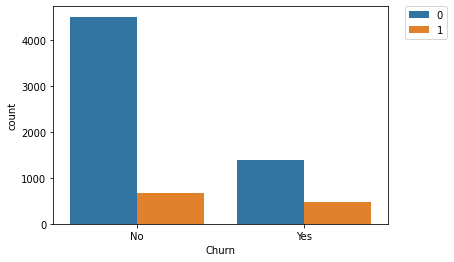

In [12]:
#Comparison total amount of Churn and Not Churn customer by Senior Citizen
ax = sns.countplot(x="Churn",hue='SeniorCitizen', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [13]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

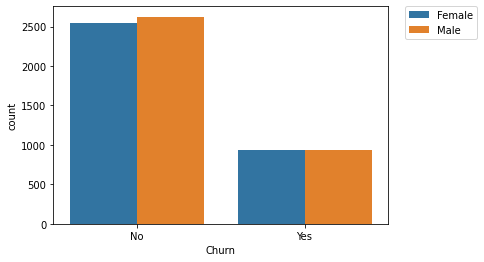

In [14]:
#Comparison total amount of Churn and Not Churn customer by gender
ax = sns.countplot(x="Churn",hue='gender', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [15]:
data['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

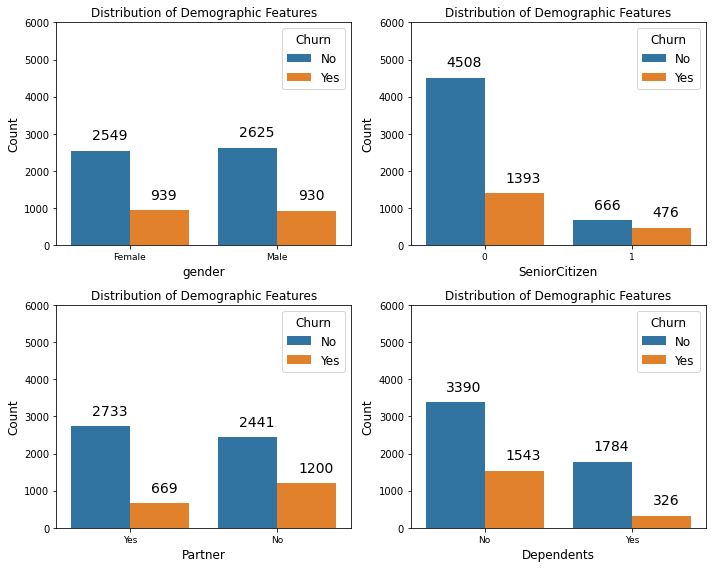

In [16]:
demo_features = ['gender','SeniorCitizen','Partner','Dependents']

plt.figure(figsize=(10,8))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = data, x = col, hue="Churn")

    plt.title ('Distribution of Demographic Features')
    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Count", fontsize= 12)
    plt.ylim(0,6000)
    plt.xticks(fontsize= 9)
    plt.legend(title = 'Churn', fontsize='large', title_fontsize='12')
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

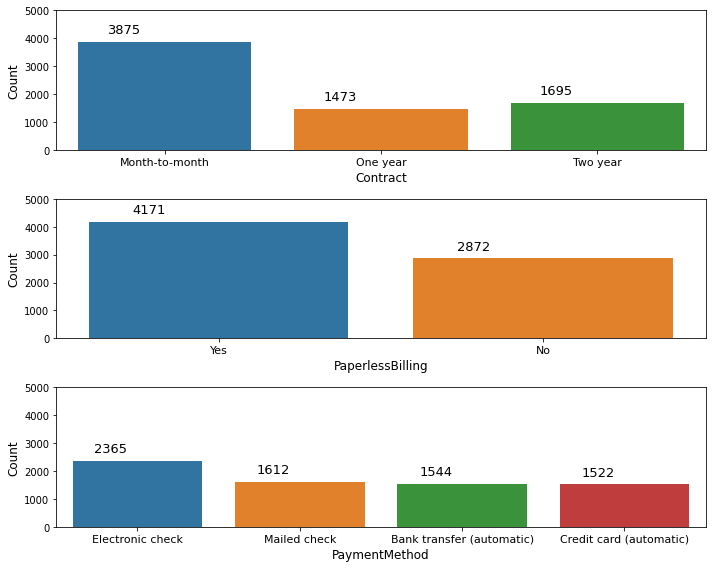

In [17]:
cat_accinfo_features = ['Contract','PaperlessBilling','PaymentMethod']
plt.figure(figsize=(10,8))

for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = data, x = col)

    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Count", fontsize= 12)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 11)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

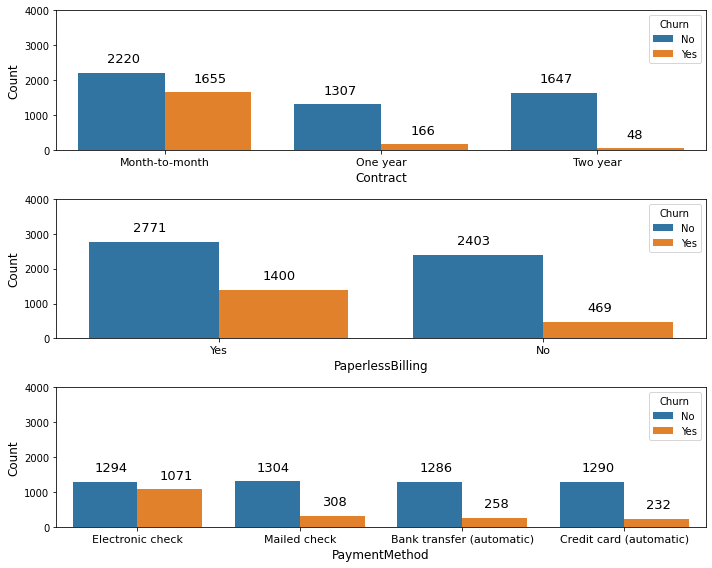

In [18]:
cat_accinfo_features = ['Contract','PaperlessBilling','PaymentMethod']

plt.figure(figsize=(10,8))

for i,col in enumerate(cat_accinfo_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = data, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 12)
    plt.ylabel("Count", fontsize= 12)
    plt.ylim(0,4000)
    plt.xticks(fontsize= 11)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 13)

plt.tight_layout()

plt.show()

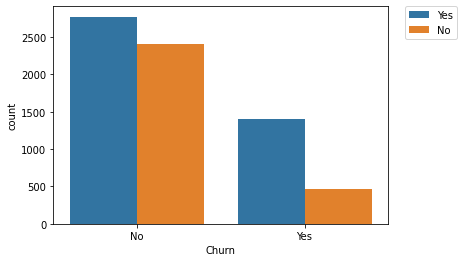

In [19]:
#pComparison total amount of Churn and Not Churn customer by paperless billing
ax = sns.countplot(x="Churn",hue='PaperlessBilling', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
data['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

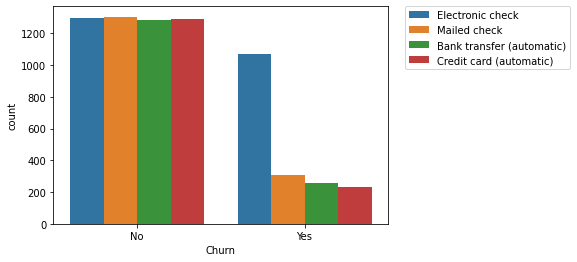

In [21]:
#Comparison total amount of Churn and Not Churn customer by payment method
ax = sns.countplot(x="Churn",hue='PaymentMethod', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [22]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

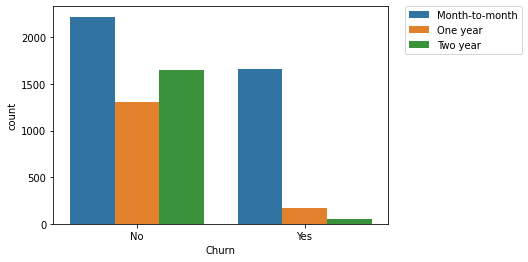

In [23]:
ax = sns.countplot(x="Churn",hue='Contract', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [24]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

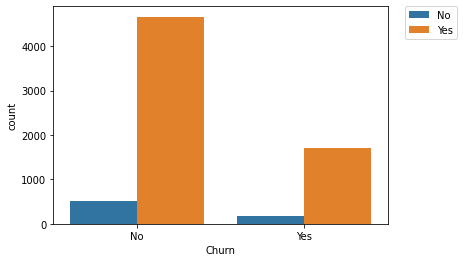

In [25]:
ax = sns.countplot(x="Churn",hue='PhoneService', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [26]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

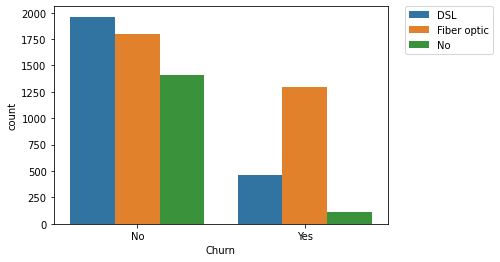

In [27]:
ax = sns.countplot(x="Churn",hue='InternetService', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [28]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

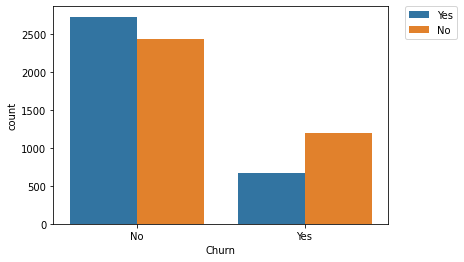

In [29]:
ax = sns.countplot(x="Churn",hue='Partner', data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [30]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

##### Pie Chart

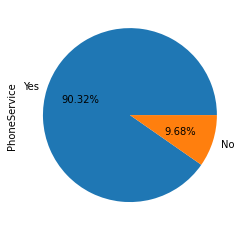

In [31]:
#Comparison total amount of Churn and Not Churn customer by Phone Service
data['PhoneService'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [32]:
data['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

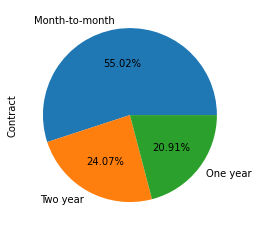

In [33]:
#Comparison total amount of Churn and Not Churn customer by contract type
data['Contract'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [34]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

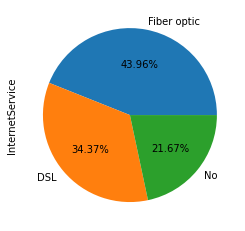

In [35]:
#Comparison total amount of Churn and Not Churn customer by InternetService
data['InternetService'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [36]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

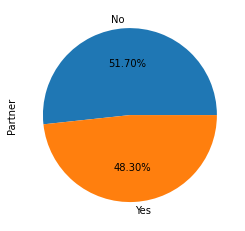

In [37]:
# Target class percentage by partner
data['Partner'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [38]:
data['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

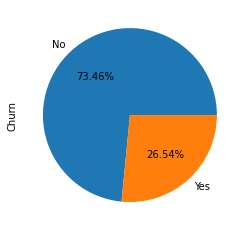

In [39]:
# Comparison of Target label
data['Churn'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [40]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

The dataset is **Imbalanced**, we will handle the imbalanced dataset later using SMOTE and ADASYN

##### **Box Plot**

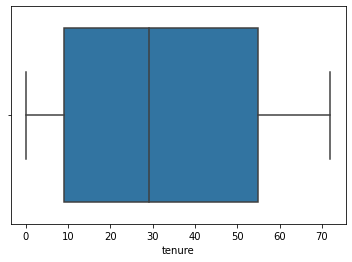

In [41]:
sns.boxplot(data.tenure)

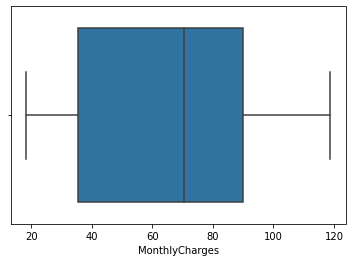

In [42]:
sns.boxplot(data.MonthlyCharges)

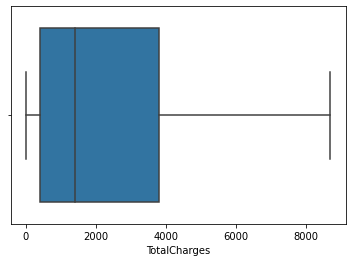

In [43]:
sns.boxplot(data.TotalCharges)

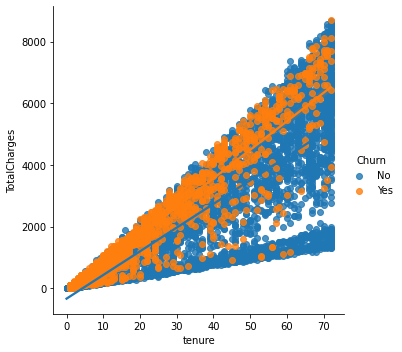

In [44]:
g = sns.lmplot(x="tenure", y="TotalCharges", hue="Churn", data=data)

#### Encoding Categorical column into Numeric



In [45]:
#encode categorical column into numerical
categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


##### Correlation Heatmap

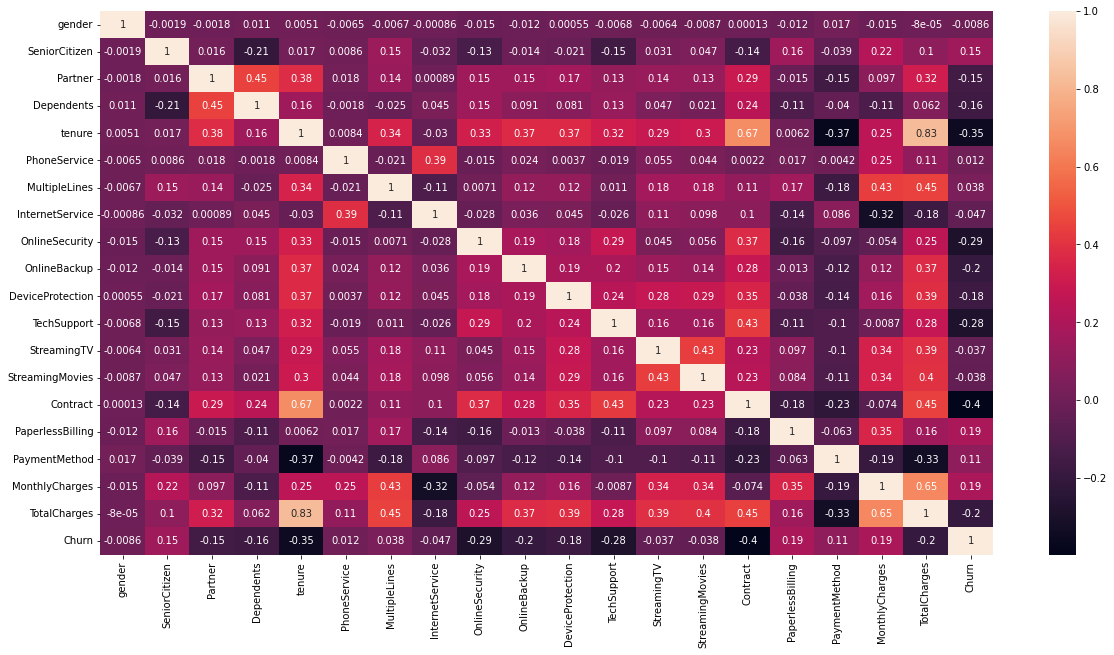

In [47]:
#Check Correlation for each column
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

##### Histogram Plot

**Analysis :** According to correlation heatmap:
SeniorCitizen, PhoneService, MultipleLines, PaperlessBilling,PaymentMethod, MonthlyCharges have positive correlation with Churn, Others column have negative correlation

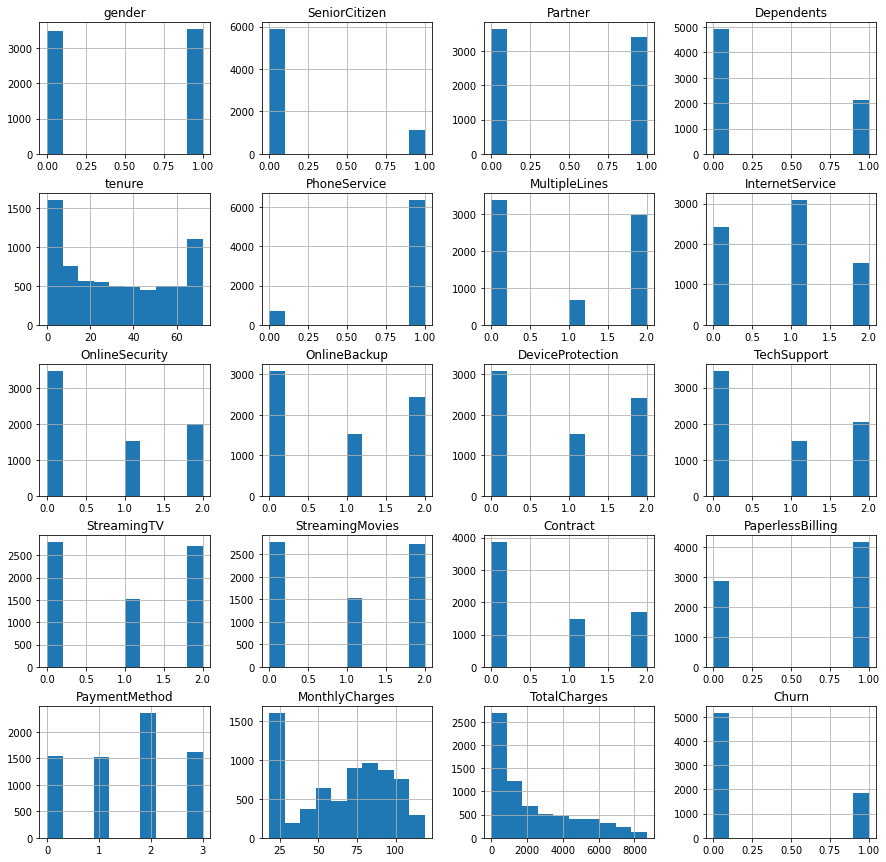

In [48]:
data.hist(figsize=(15,15))
plt.show()

##MODELING

Our objective is to create model with greatest **recall** score, the higher the recall value means the lower false negative value. False negative means the actual label is Churn but predicted as No Churn, we assume the greater False Negative value will impact increase the cost occured in Telco.


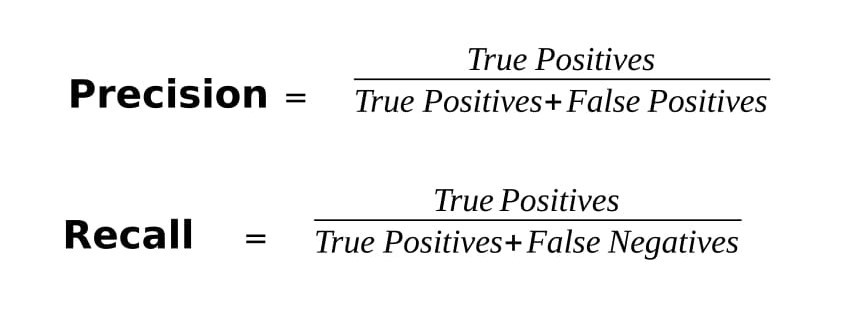

###Logistic Regression

In [49]:
df_X = data.drop(['customerID',	'Churn'],axis=1)
df_y = data[['Churn']]

Accuracy  0.8102224325603408
Precision  0.7472368922867874
Recall  0.7339373625848389
Confusion matrix  [[1405  180]
 [ 221  307]]


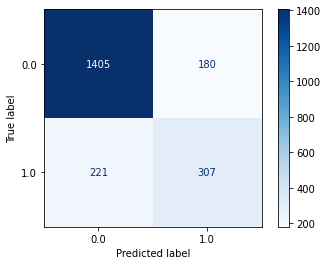

In [50]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# data preprocessing selesai

#mulai melakukan modelling. model ML learning dari training set 
model=LogisticRegression()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###MLP for binary classification

Accuracy  0.8021769995267393
Precision  0.7358702645280986
Recall  0.7260485374247203
f1 score  0.7306267323157403
Confusion matrix  [[1392  193]
 [ 225  303]]


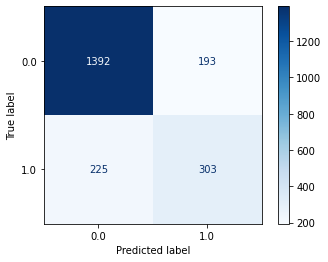

In [55]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#mulai learning 
model=MLPClassifier()
#model=MLPClassifier(max_iter=1000, activation='logistic', hidden_layer_sizes=(200,100),random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###K Neighbour


Accuracy  0.7856128726928537
Precision  0.7117818624365269
Recall  0.6809058646400917
f1 score  0.692669347653334
Confusion matrix  [[1411  174]
 [ 279  249]]


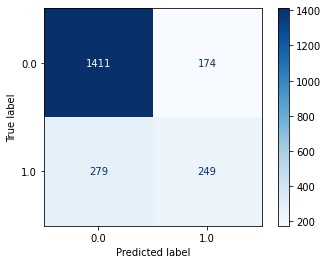

In [56]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=KNeighborsClassifier(n_neighbors=10)
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###Decision Tree

Accuracy  0.7998106956933271
Precision  0.732698306972194
Recall  0.713735541535226
f1 score  0.721977575901793
Confusion matrix  [[1404  181]
 [ 242  286]]


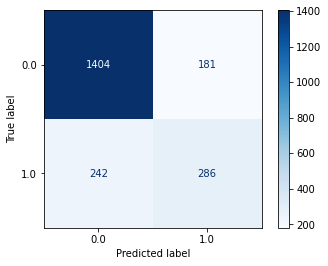

In [57]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=DecisionTreeClassifier(criterion="entropy", max_depth=100, max_leaf_nodes=100, random_state=1)
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###Random Forest

Accuracy  0.8054898248935163
Precision  0.74111246211783
Recall  0.7194155673453781
f1 score  0.728729649874289
Confusion matrix  [[1413  172]
 [ 239  289]]


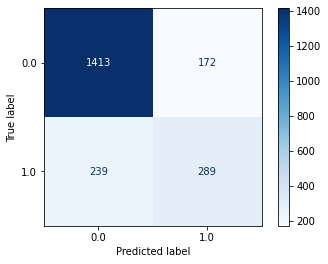

In [58]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=RandomForestClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###Adaboost

Accuracy  0.8050165641268339
Precision  0.739994131455399
Recall  0.7247837204856132
f1 score  0.7316200045379659
Confusion matrix  [[1403  182]
 [ 230  298]]


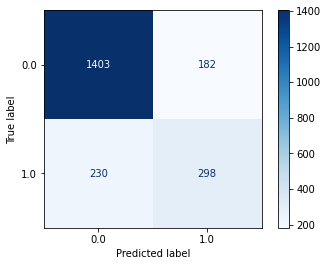

In [59]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model=AdaBoostClassifier()
model.fit(X_train, y_train)

# membuat prediksi
y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###SVM for binary classification

Accuracy  0.8069096071935636
Precision  0.7456538799464305
Recall  0.7064686693432751
f1 score  0.7213201238197942
Confusion matrix  [[1438  147]
 [ 261  267]]


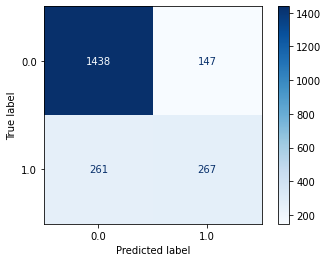

In [60]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#mulai learning 
model=SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###Gradient Boosting Classifier

Accuracy  0.8116422148603881
Precision  0.7501742549777742
Recall  0.7273055874199408
F1 Score  0.7371253060193602
Confusion matrix  [[1420  165]
 [ 233  295]]


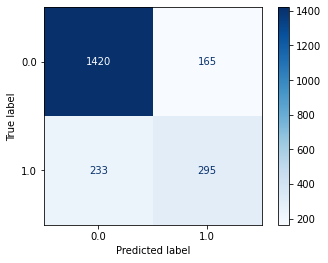

In [61]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#mulai learning 
model=GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('F1 Score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##MODEL + IMBALANCED DATA HANDLING

###SMOTE+ Logitic Regression

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7595835305253195
Precision  0.7168265934288273
Recall  0.776596405697352
f1 score  0.7250338647173704
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      1585
         1.0       0.51      0.81      0.63       528

    accuracy                           0.76      2113
   macro avg       0.72      0.78      0.73      2113
weighted avg       0.82      0.76      0.77      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb5fbc4ac10>


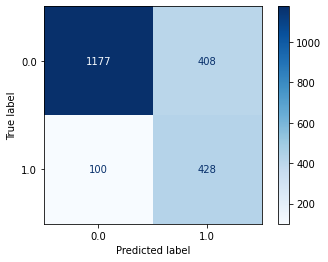

In [62]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=LogisticRegression()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts()) 
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))

###SMOTE+MLP

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7761476573592049
Precision  0.7126656420055664
Recall  0.7446945798680814
f1 score  0.7237846665168755
              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84      1585
         1.0       0.54      0.68      0.60       528

    accuracy                           0.78      2113
   macro avg       0.71      0.74      0.72      2113
weighted avg       0.80      0.78      0.78      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb5fbc34590>


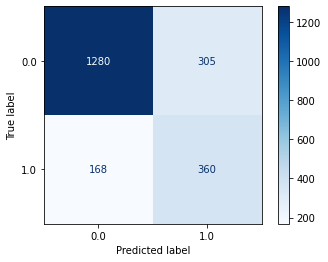

In [63]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=MLPClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts()) 
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7595835305253195
Precision  0.7168265934288273
Recall  0.776596405697352
f1 score  0.7250338647173704
              precision    recall  f1-score   support

         0.0       0.92      0.74      0.82      1585
         1.0       0.51      0.81      0.63       528

    accuracy                           0.76      2113
   macro avg       0.72      0.78      0.73      2113
weighted avg       0.82      0.76      0.77      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb5fba90dd0>


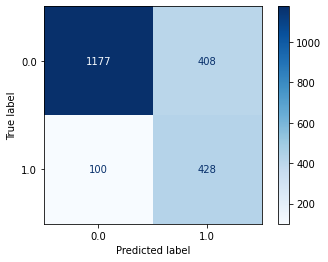

In [64]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=LogisticRegression()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts()) 
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))

###SMOTE+DT

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7624230951254141
Precision  0.7028863726340963
Recall  0.7424929500047797
f1 score  0.714059814406266
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83      1585
         1.0       0.52      0.70      0.60       528

    accuracy                           0.76      2113
   macro avg       0.70      0.74      0.71      2113
weighted avg       0.80      0.76      0.77      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb60129fd90>


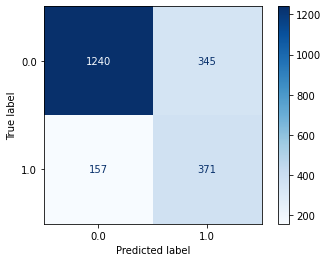

In [65]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=DecisionTreeClassifier(criterion="entropy", max_depth=100, max_leaf_nodes=100, random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))  
plt.show()

###SMOTE+RF

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7898722195929957
Precision  0.7231415537867151
Recall  0.7405810868941785
f1 score  0.730618418876454
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      1585
         1.0       0.57      0.64      0.60       528

    accuracy                           0.79      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.80      0.79      0.79      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb60177b550>


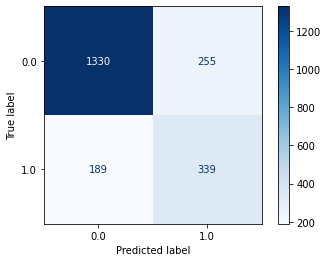

In [66]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=RandomForestClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))  
plt.show()

### SMOTE+SVM

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7562707051585423
Precision  0.7038312641192486
Recall  0.7522852738743906
f1 score  0.7140411386376029
              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      1585
         1.0       0.51      0.74      0.60       528

    accuracy                           0.76      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.80      0.76      0.77      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb5fba7a2d0>


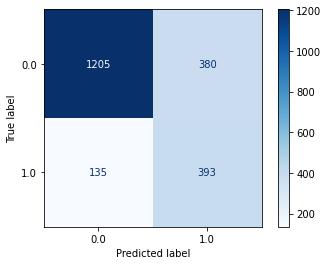

In [67]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=SVC()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))  
plt.show()

###SMOTE + GRADIENT BOOSTING

sebelum smote
Churn
0.0      3589
1.0      1341
dtype: int64
setelah smote
Churn
0.0      3589
1.0      3589
dtype: int64
Accuracy  0.7860861334595362
Precision  0.726587531954332
Recall  0.765843968071886
f1 score  0.7393169391747896
              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85      1585
         1.0       0.56      0.73      0.63       528

    accuracy                           0.79      2113
   macro avg       0.73      0.77      0.74      2113
weighted avg       0.81      0.79      0.79      2113

Confusion matrix  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fb5fc795890>


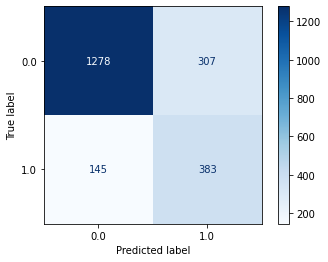

In [68]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=GradientBoostingClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts()) 
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print(classification_report(y_test, y_pred))
print('Confusion matrix ', plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues))

###ADASYN + Logistic Regression

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.7415996213913867
Precision  0.7098691048698186
Recall  0.7740817082496894
f1 score  0.711648164662505
Confusion matrix  [[1124  461]
 [  85  443]]


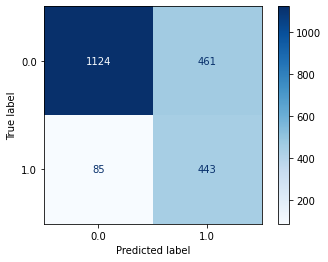

In [69]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=LogisticRegression()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###ADASYN + MLP

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.7619498343587316
Precision  0.7102319301798543
Recall  0.7604913488194245
f1 score  0.7209421454056522
Confusion matrix  [[1210  375]
 [ 128  400]]


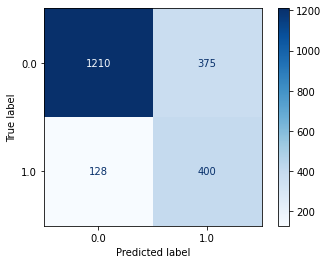

In [70]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=MLPClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###ADASYN + DT

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.7510648367250355
Precision  0.7095491854513836
Recall  0.7683921231239843
f1 score  0.7163720752667757
Confusion matrix  [[1163  422]
 [ 104  424]]


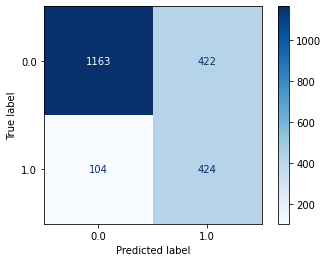

In [71]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=DecisionTreeClassifier(criterion="entropy", max_depth=100, max_leaf_nodes=100, random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###ADASYN + RF

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.77520113582584
Precision  0.7229212174166302
Recall  0.7743762546601662
f1 score  0.7351141502499943
Confusion matrix  [[1230  355]
 [ 120  408]]


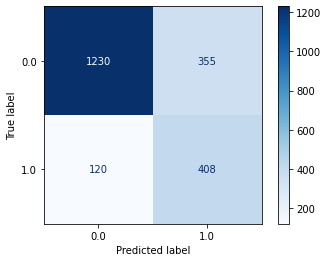

In [72]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=RandomForestClassifier(n_estimators=100, max_depth=100, max_leaf_nodes=100, criterion='entropy', random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###ADASYN + SVM

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.7510648367250355
Precision  0.7031834690471805
Recall  0.7557618774495747
f1 score  0.7119080501243154
Confusion matrix  [[1183  402]
 [ 124  404]]


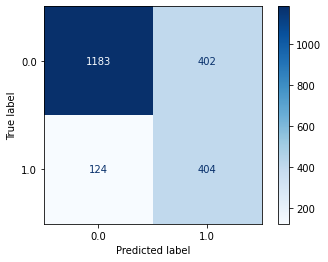

In [73]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=SVC()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###ADASYN + GRADIENT BOOSTING

sebelum adasyn
Churn
0.0      3589
1.0      1341
dtype: int64
setelah adasyn
Churn
1.0      3634
0.0      3589
dtype: int64
Accuracy  0.7780407004259347
Precision  0.7204285605815379
Recall  0.7636387534652519
f1 score  0.732981708787515
Confusion matrix  [[1256  329]
 [ 140  388]]


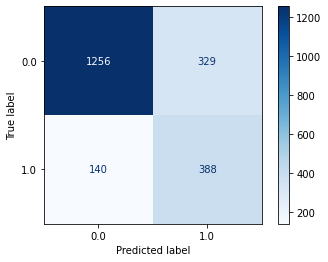

In [74]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

adasyn = ADASYN(random_state=0)
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

model=GradientBoostingClassifier()
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('sebelum adasyn')
print(pd.DataFrame(y_train).value_counts())
print('setelah adasyn')
print(pd.DataFrame(y_resampled).value_counts())
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('f1 score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

## Hypertuning GRID SEARCH CV
We choose 2 model:

*   Logistic Regression+SMOTE
*   Random Forest+SMOTE




#### SMOTE + Logistic Regression

In [75]:
model = LogisticRegression()

param_dist = {"max_iter": list(range(90,200)),
              "class_weight": ['balanced','dict']}

# Run a Grid Search CV over the hyperparameters
grid_objt = GridSearchCV(model, param_grid=param_dist)

# Fit the model on the training data
grid_objt.fit(X_train, y_train)

# show the best estimator that we have choosed
grid_objt.best_estimator_

LogisticRegression(class_weight='dict', max_iter=90)

Accuracy  0.7595835305253195
Precision  0.7168265934288273
Recall  0.776596405697352
F1 Score  0.7250338647173704
Confusion matrix  [[1177  408]
 [ 100  428]]


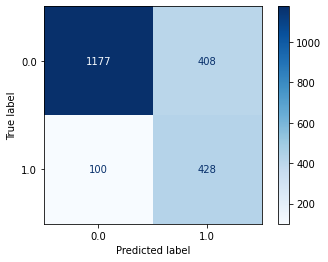

In [76]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=LogisticRegression(class_weight='balanced', max_iter=90)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))      
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('F1 Score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

#### SMOTE + Random Forest

In [77]:
model = LogisticRegression()

param_dist = {"max_iter": list(range(90,110)),
              "class_weight": ['balanced','dict']}

# Run a Grid Search CV over the hyperparameters
grid_objt = GridSearchCV(model, param_grid=param_dist)

# Fit the model on the training data
grid_objt.fit(X_train, y_train)

# show the best estimator that we have choosed
grid_objt.best_estimator_

LogisticRegression(class_weight='dict', max_iter=90)

Accuracy  0.7799337434926644
Precision  0.7241507480385887
Recall  0.7705841936717331
F1 Score  0.7369676448880498
Confusion matrix  [[1251  334]
 [ 131  397]]


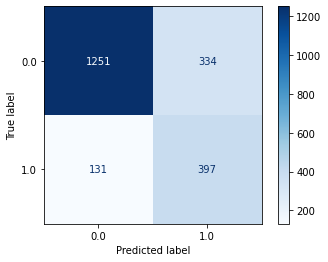

In [78]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=RandomForestClassifier(n_estimators=100, max_depth=100, max_leaf_nodes=100, criterion='entropy', random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))      
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('F1 Score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

#### SMOTE + Gradient Boosting

In [79]:
model = GradientBoostingClassifier()

param_dist = { "n_estimators": list(range(90,110)),
              "min_samples_leaf" : list(range(1, 5)),
              "loss": ['deviance', 'exponential']}

# Run a Grid Search CV over the hyperparameters
grid_objt = GridSearchCV(model, param_grid=param_dist)

# Fit the model on the training data
grid_objt.fit(X_train, y_train)

# show the best estimator that we have choosed
grid_objt.best_estimator_

GradientBoostingClassifier(loss='exponential', min_samples_leaf=2,
                           n_estimators=90)

Accuracy  0.7879791765262659
Precision  0.7311920479414067
Recall  0.7759469696969697
F1 Score  0.7445787085605247
Confusion matrix  [[1268  317]
 [ 131  397]]


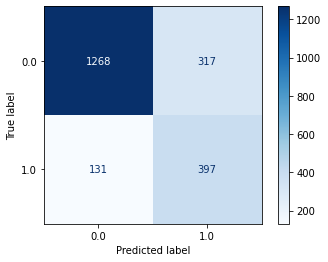

In [80]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
         'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
         'PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

#scaling
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

model=GradientBoostingClassifier(n_estimators=90,min_samples_leaf=2,loss='exponential')
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))      
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('F1 Score ',f1_score(y_test, y_pred, average='macro'))  
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()

Before feature selection (4930, 19)
After feature selection (4930, 10)
Score of features [6.20554800e-01 1.12282180e+02 9.94953886e+01 1.14590516e+02
 6.78283600e+02 1.67803843e+00 8.96278868e+00 1.20592418e+01
 4.33813598e+02 1.88828376e+02 1.59749338e+02 4.09222757e+02
 7.91369289e+00 5.21332890e+00 8.98443892e+02 1.65266998e+02
 5.12096671e+01 1.94743699e+02 1.87641444e+02]


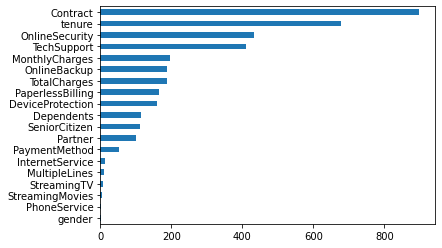

In [81]:
#logistic
X = data.drop(['customerID',	'Churn'],axis=1)
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

filter = SelectKBest(f_classif, k=10)
filter.fit(X_train, y_train)

X_train_filter = filter.transform(X_train)
X_test_filter = filter.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_filter.shape)

print("Score of features", filter.scores_)

feature_importance = pd.Series(filter.scores_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Accuracy  0.807382867960246
Precision  0.743343244262362
Recall  0.7282555444030208
Confusion matrix  [[1405  180]
 [ 227  301]]


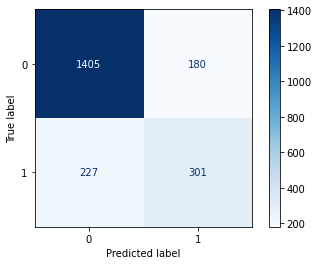

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1585
           1       0.63      0.57      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [82]:
scaler = MinMaxScaler().fit(X_train_filter)
X_train = scaler.transform(X_train_filter)
X_test = scaler.transform(X_test_filter)

# modelling with logistic regression
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
print(classification_report(y_test, y_pred))

Before feature selection (4930, 19)
After feature selection (4930, 10)
Score of features [6.20554800e-01 1.12282180e+02 9.94953886e+01 1.14590516e+02
 6.78283600e+02 1.67803843e+00 8.96278868e+00 1.20592418e+01
 4.33813598e+02 1.88828376e+02 1.59749338e+02 4.09222757e+02
 7.91369289e+00 5.21332890e+00 8.98443892e+02 1.65266998e+02
 5.12096671e+01 1.94743699e+02 1.87641444e+02]


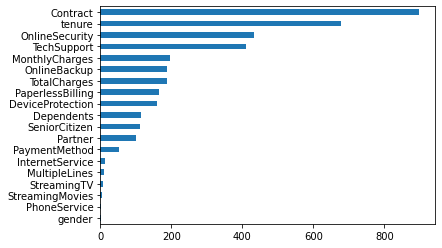

In [83]:
#random forest
X = data.drop(['customerID',	'Churn'],axis=1)
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

filter = SelectKBest(f_classif, k=10)
filter.fit(X_train, y_train)

X_train_filter = filter.transform(X_train)
X_test_filter = filter.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_filter.shape)

print("Score of features", filter.scores_)

feature_importance = pd.Series(filter.scores_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Accuracy  0.8050165641268339
Precision  0.7397987194610756
Recall  0.7317303556065385
Confusion matrix  [[1392  193]
 [ 219  309]]


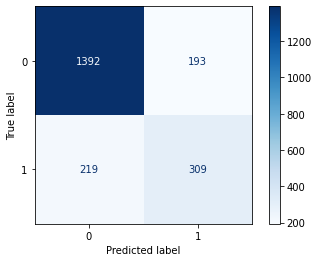

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.59      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [84]:
scaler = MinMaxScaler().fit(X_train_filter)
X_train = scaler.transform(X_train_filter)
X_test = scaler.transform(X_test_filter)

# modelling with logistic regression
clf = MLPClassifier(max_iter=1000, activation='logistic', hidden_layer_sizes=(200,100),random_state=1)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
print(classification_report(y_test, y_pred))

Before feature selection (4930, 19)
After feature selection (4930, 5)
Score of features [13  1  6  2  7  3  5  9  1  4  8  1 14 12  1  1 10 11 15]


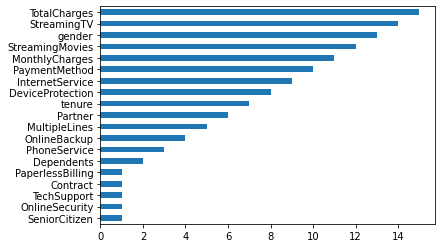

In [85]:
#logistic
X = data.drop(['customerID',	'Churn'],axis=1)
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = LogisticRegression()
wrapper = RFE(clf, n_features_to_select=5)
wrapper.fit(X_train, y_train)

X_train_wrapper = wrapper.transform(X_train)
X_test_wrapper = wrapper.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_wrapper.shape)

print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Accuracy  0.792238523426408
Precision  0.7219836976936369
Recall  0.7118457843418411
Confusion matrix  [[1383  202]
 [ 237  291]]


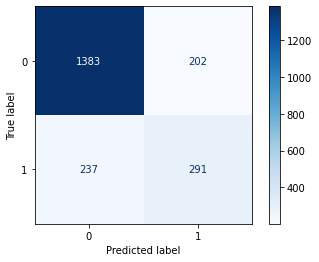

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1585
           1       0.59      0.55      0.57       528

    accuracy                           0.79      2113
   macro avg       0.72      0.71      0.72      2113
weighted avg       0.79      0.79      0.79      2113



In [86]:
scaler = MinMaxScaler().fit(X_train_wrapper)
X_train = scaler.transform(X_train_wrapper)
X_test = scaler.transform(X_test_wrapper)

# modelling with logistic regression
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
print(classification_report(y_test, y_pred))

Before feature selection (4930, 19)
After feature selection (4930, 10)
Score of features [ 8  5  7  9  1 10  3  1  1  1  2  1  6  1  1  4  1  1  1]


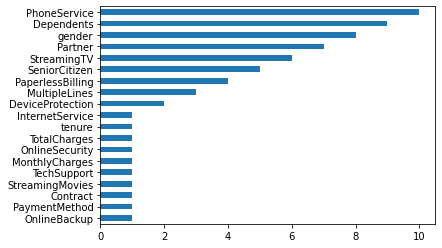

In [87]:
#random forest
X = data.drop(['customerID',	'Churn'],axis=1)
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
clf = RandomForestClassifier(n_estimators=100, max_depth=100, max_leaf_nodes=100, criterion='entropy', random_state=1)
wrapper = RFE(clf, n_features_to_select=10)
wrapper.fit(X_train, y_train)

X_train_wrapper = wrapper.transform(X_train)
X_test_wrapper = wrapper.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_wrapper.shape)

print("Score of features", wrapper.ranking_)

feature_importance = pd.Series(wrapper.ranking_, index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Accuracy  0.8102224325603408
Precision  0.748806348179883
Recall  0.7206756046267087
Confusion matrix  [[1426  159]
 [ 242  286]]


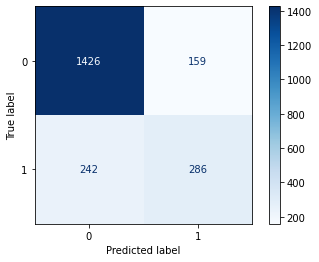

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1585
           1       0.64      0.54      0.59       528

    accuracy                           0.81      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



In [88]:
scaler = MinMaxScaler().fit(X_train_wrapper)
X_train = scaler.transform(X_train_wrapper)
X_test = scaler.transform(X_test_wrapper)

# modelling with logistic regression
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
print(classification_report(y_test, y_pred))

Before feature selection (4930, 19)
After feature selection (4930, 6)

Coef [-3.78927619e-02  2.87441835e-01  3.11971214e-02 -1.40476032e-01
 -6.42317352e-02 -3.86008307e-01  1.26863358e-01  5.70643141e-02
 -3.02483322e-01 -1.32751656e-01 -1.22698492e-01 -3.16891240e-01
  3.37092691e-02  8.64232152e-02 -6.80667923e-01  3.17531663e-01
 -5.83750623e-02  1.44495314e-02  3.71030008e-04]
Treshold 0.1682909404160835


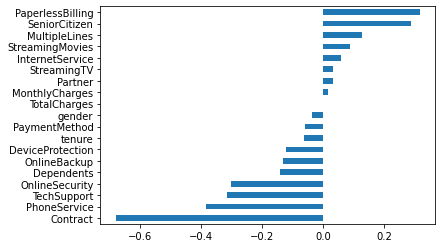

In [89]:
#logistic
X = data.drop(['customerID',	'Churn'],axis=1)
y = data[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = LogisticRegression()
clf_feature = SelectFromModel(clf)

clf_feature.fit(X_train, y_train)

X_train_importance = clf_feature.transform(X_train)
X_test_importance = clf_feature.transform(X_test)

print("Before feature selection", X_train.shape)
print("After feature selection", X_train_importance.shape)
print()

print("Coef",clf_feature.estimator_.coef_[0])
print("Treshold",clf_feature.threshold_)

feature_importance = pd.Series(clf_feature.estimator_.coef_[0], index=X_train.columns)
feature_importance.sort_values().plot(kind='barh')
plt.show()

Accuracy  0.7879791765262659
Precision  0.7160571702930534
Recall  0.7064806184877163
Confusion matrix  [[1378  207]
 [ 241  287]]


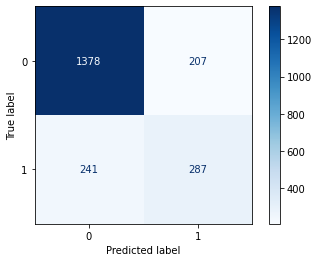

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1585
           1       0.58      0.54      0.56       528

    accuracy                           0.79      2113
   macro avg       0.72      0.71      0.71      2113
weighted avg       0.78      0.79      0.79      2113



In [90]:
scaler = MinMaxScaler().fit(X_train_importance)
X_train = scaler.transform(X_train_importance)
X_test = scaler.transform(X_test_importance)

# modelling with logistic regression
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro'))
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)  
plt.show()
print(classification_report(y_test, y_pred))

In [91]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [92]:
ex_kf = KFold(n_splits=15, shuffle=True).split(range(20))

# show the training and testing set
print('{} {:^61} {}'.format("Iteration","Training set observation","Testing set observation"))

for i, k in enumerate(ex_kf, start=1):
  print("{:^9} {} {:^25}".format(i, k[0], str(k[1])))

Iteration                   Training set observation                    Testing set observation
    1     [ 0  1  2  3  4  5  6  7  8  9 10 12 13 14 15 17 18 19]          [11 16]         
    2     [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]          [ 1 19]         
    3     [ 0  1  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]           [2 4]          
    4     [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19]          [ 3 15]         
    5     [ 0  1  2  3  4  5  6  7  8 10 11 12 13 15 16 17 18 19]          [ 9 14]         
    6     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19]           [13]           
    7     [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19]            [7]           
    8     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19]           [18]           
    9     [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]            [0]           
   10     [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18

In [93]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()

scores = cross_val_score(model, X, y, cv=15, scoring='roc_auc')
print(scores)
print()
print("Average of accuracy using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scores.mean(), scores.std()))

[0.84985507 0.84352464 0.87318261 0.85929275 0.83763478 0.85966377
 0.84577391 0.83297391 0.80265311 0.82947639 0.83158018 0.84181861
 0.82307153 0.85191678 0.83555814]

Average of accuracy using CV 10 fold (0.84120) and the standard deviation (0.01646)


In [94]:
X = df_X.astype(float).values
y = df_y.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100, max_depth=100, max_leaf_nodes=100, criterion='entropy', random_state=1)

scores = cross_val_score(model, X, y, cv=15, scoring='roc_auc')
print(scores)
print()
print("Average of accuracy using CV 10 fold ({:.5f}) and the standard deviation ({:.5f})".format(scores.mean(), scores.std()))

[0.86289855 0.8526029  0.87114203 0.86156522 0.84811594 0.86038261
 0.85122319 0.83065507 0.80365825 0.84371201 0.82318841 0.85072464
 0.83728378 0.85591398 0.84306977]

Average of accuracy using CV 10 fold (0.84641) and the standard deviation (0.01673)
